In [4]:
import sys
sys.path.insert(0, "../..")

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

## Single Electron Transistor

We calculate the output current for a one-nanoparticle network under varied input voltages.

### Variable Input Voltage

In [6]:
net = Network(1,1,1,[[0,0,0],[0,0,0]])
mf = MeanField(net)

In [8]:
N = 200
Us = np.linspace(-0.1, 0.1, N)
Is = np.zeros(N)
for i, U in enumerate(Us):
    net.set_voltage_config([U, 0], 0)
    state = mf.numeric_integration_solve(N = 7)
    Is[i] = -mf.calc_expected_electrode_current(state, 1) * CONST.electron_charge

In [11]:
# KMC data
_, U_data, I_data = np.loadtxt("../../data/set/set_0.0.csv", unpack = True, skiprows = 1, delimiter = ",")
I_data = I_data / 1000 * CONST.electron_charge

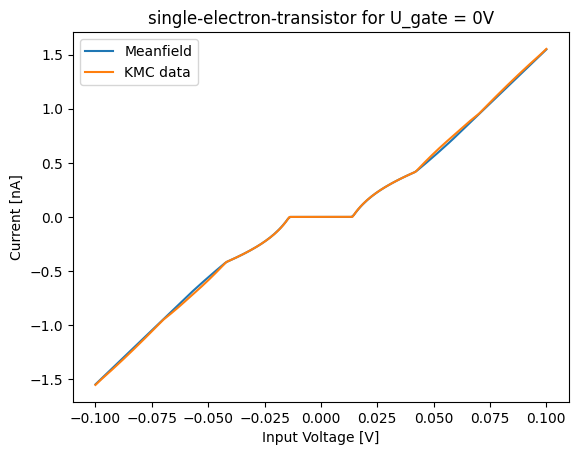

In [16]:
# currents
plt.plot(Us, Is, label = "Meanfield")
plt.plot(U_data, I_data, label = "KMC data")
plt.xlabel("Input Voltage [V]")
plt.ylabel("Current [nA]")
plt.title("single-electron-transistor for U_gate = 0V")
plt.legend()
plt.savefig("../../output/set_kmc.png")

## Diamonds

In [3]:
net = Network(1,1,1,[[0,0,0],[0,0,0]])
mf = MeanField(net)

In [4]:
N_gate = 150
Us_gate = np.linspace(-0.1, 0.1, N_gate)

N_input = N_gate
Us_input = np.linspace(-0.1, 0.1, N_input)

In [5]:
I_output = np.zeros((N_gate, N_input))

for i, U_gate in enumerate(Us_gate):
    for j, U_input in enumerate(Us_input):
        net.set_voltage_config([U_input, 0], U_gate)
        state = mf.numeric_integration_solve(N = 5)
        I_output[i, j] = -mf.calc_expected_electrode_current(state, 1) * CONST.electron_charge

In [7]:
# np.savetxt("../data/set_diamond_currents.csv", I_output)
I_output = np.loadtxt("../data/set_diamond_currents.csv")

In [8]:
grad_output = np.gradient(I_output, 0.2/N_input, axis = 1)

img = np.swapaxes(grad_output, 0, 1)
img = np.flip(img, axis = 0)

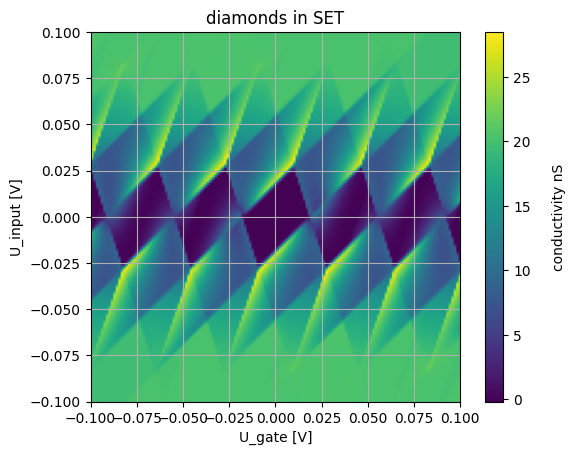

In [10]:
plt.imshow(img, extent = (Us_gate[0],Us_gate[-1],Us_input[0],Us_input[-1]))
plt.grid()
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('conductivity nS', rotation = 90)
plt.xlabel("U_gate [V]")
plt.ylabel("U_input [V]")
plt.title("diamonds in SET")
plt.savefig("../output/set_diamonds.png")